# Part I - European Values Study 1999
## by Ferdawes Haouala

## Introduction

The European Values Study 1999 is a large-scale, cross-national and longitudinal survey research program carried out under the responsibility of the European Values Study Foundation. The five EVS waves 1981, 1990, 2008, and 2017 cover a broad range of topics including the main domains of life: work and leisure time, family and sexuality, religion, politics and ethics. 

I choose to focus on work, life satisfaction and demographics variables 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

%matplotlib inline

> Loading in the dataset that I already cleaned in notebook called "Cleaning European Values Study 1999"


In [2]:
#Load the clean dataset
df_new = pd.read_csv('EVS_1999.csv',index_col=0)
df_new

,work_importance,religion_importance,overall_hapineess,overal_satisfaction_work,free_to_choose,life_satisfaction,pay_important_job,people _important_job,no_pressure_important_job,security_important_job,...,interesting_important_job,sex,age,marital_status,highest_educ_lvl,employment_status,numb_employees_organisation,job_type,duration_unemployment,country
0,very important,very important,very happy,0,6,8,mentioned,mentioned,mentioned,mentioned,...,mentioned,female,40.0,single,full 2nd maturity level certificate,retired/pensioned,NaN,middle level non-manual -office worker etc,NaN,Turkey
1,very important,not important,quite happy,8,10,3,mentioned,mentioned,mentioned,not mentioned,...,mentioned,female,24.0,married,higher educ- upper-level 3d certificate,less then 30h a week,2-9,"professional worker (lawyer, accountant, teach...",NaN,Turkey
2,very important,quite important,not at all happy,0,8,3,mentioned,mentioned,mentioned,mentioned,...,not mentioned,male,49.0,married,full 2nd maturity level certificate,retired/pensioned,NaN,"professional worker (lawyer, accountant, teach...",NaN,Turkey
3,very important,not at all important,quite happy,7,10,1,mentioned,mentioned,mentioned,mentioned,...,not mentioned,male,31.0,cohabiting,higher educ- upper-level 3d certificate,self employed,NaN,"professional worker (lawyer, accountant, teach...",NaN,Turkey
4,very important,quite important,very happy,0,3,10,mentioned,mentioned,mentioned,mentioned,...,mentioned,male,23.0,single,higher educ- upper-level 3d certificate,student,NaN,NaN,NaN,Turkey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,very important,not important,not very happy,4,2,4,not mentioned,mentioned,not mentioned,not mentioned,...,mentioned,male,60.0,married,(compl) elementary educ+basic voc qualification,30h a week or more,NaN,employer/manager of establ with less than 10 e...,NaN,France
4853,not important,not at all important,quite happy,6,7,7,mentioned,not mentioned,not mentioned,mentioned,...,mentioned,female,43.0,never married,higher educ- upper-level 3d certificate,30h a week or more,NaN,"professional worker (lawyer, accountant, teach...",NaN,France
4854,very important,not at all important,quite happy,8,8,8,mentioned,not mentioned,not mentioned,not mentioned,...,mentioned,male,34.0,never married,higher educ- upper-level 3d certificate,30h a week or more,NaN,"professional worker (lawyer, accountant, teach...",NaN,France
4855,very important,very important,quite happy,0,8,8,not mentioned,mentioned,not mentioned,not mentioned,...,mentioned,male,29.0,never married,higher educ- lower-level 3d certificate,unemployed,NaN,middle level non-manual -office worker etc,less than half a year,France


In [3]:
#test
df_new.dtypes

work_importance                 object
religion_importance             object
overall_hapineess               object
overal_satisfaction_work         int64
free_to_choose                   int64
life_satisfaction                int64
pay_important_job               object
people _important_job           object
no_pressure_important_job       object
security_important_job          object
promotion_important_job         object
hours_important_job             object
usefulness_important_job        object
holidays_important_job          object
achieving_important_job         object
responsible_important_job       object
interesting_important_job       object
sex                             object
age                            float64
marital_status                  object
highest_educ_lvl                object
employment_status               object
numb_employees_organisation     object
job_type                        object
duration_unemployment           object
country                  

In [4]:
df_new.describe()

,overal_satisfaction_work,free_to_choose,life_satisfaction,age
count,4857.000000,4857.000000,4857.000000,4855.000000
mean,3.129710,6.471484,6.665020,44.315345
std,3.829358,2.634375,2.503374,17.256447
min,0.000000,0.000000,0.000000,18.000000
25%,0.000000,5.000000,5.000000,30.000000
50%,0.000000,7.000000,7.000000,42.000000
75%,7.000000,8.000000,8.000000,58.000000
max,10.000000,10.000000,10.000000,93.000000


In [5]:
df_new.isnull().sum()

work_importance                  29
religion_importance              46
overall_hapineess                50
overal_satisfaction_work          0
free_to_choose                    0
life_satisfaction                 0
pay_important_job                34
people _important_job            56
no_pressure_important_job       136
security_important_job           26
promotion_important_job         126
hours_important_job             108
usefulness_important_job        114
holidays_important_job          134
achieving_important_job          81
responsible_important_job        96
interesting_important_job        64
sex                               0
age                               2
marital_status                   67
highest_educ_lvl                 25
employment_status                10
numb_employees_organisation    3983
job_type                       1594
duration_unemployment          4447
country                           0
dtype: int64

In [6]:
df_new.duplicated().sum()

0

In [7]:
df_new.columns

Index(['work_importance', 'religion_importance', 'overall_hapineess',
       'overal_satisfaction_work', 'free_to_choose', 'life_satisfaction',
       'pay_important_job', 'people _important_job',
       'no_pressure_important_job', 'security_important_job',
       'promotion_important_job', 'hours_important_job',
       'usefulness_important_job', 'holidays_important_job',
       'achieving_important_job', 'responsible_important_job',
       'interesting_important_job', 'sex', 'age', 'marital_status',
       'highest_educ_lvl', 'employment_status', 'numb_employees_organisation',
       'job_type', 'duration_unemployment', 'country'],
      dtype='object')

In [8]:
df_new.overall_hapineess.value_counts()

quite happy         2647
very happy          1152
not very happy       724
not at all happy     284
Name: overall_hapineess, dtype: int64

### What is the structure of your dataset?

> There are 4857 random person who responded to the european value study survey
the 26 questions answered are about :
- work_importance, how important is work to respondants 
- religion_importance, how important is religion to respondants 
- overall_hapineess
-  'overal_satisfaction_work', 'free_to_choose', 'life_satisfaction' from 1 to 10
- Demographic variable  : 'sex', 'age', 'marital_status','highest_educ_lvl', 'employment_status', 'numb_employees_organisation','job_type', 'duration_unemployment', 'country', 'category_age'
- the columns bellow are the answer to the question what criterias are important to have in a job with criterias in ['pay', holidays, people, hours,...] : 
'pay_important_job', 'people _important_job',
       'no_pressure_important_job', 'security_important_job',
       'promotion_important_job', 'hours_important_job',
       'usefulness_important_job', 'holidays_important_job',
       'achieving_important_job', 'responsible_important_job',
       'interesting_important_job'


Most variables are objects (they are categorical in nature) in dataframe, but the variables 'overal_satisfaction_work', 'free_to_choose', 'life_satisfaction', age are numerical



### What is/are the main feature(s) of interest in your dataset?

> I would like to know what variables have an effect on work importance and life satisfaction

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that age has an impact on considering work important or not
and the country maybe

## Univariate Exploration 


### First I am curious about the distribution of the sample in terms of sex and country

In [9]:
df_new['sex'].value_counts()

female    2570
male      2287
Name: sex, dtype: int64

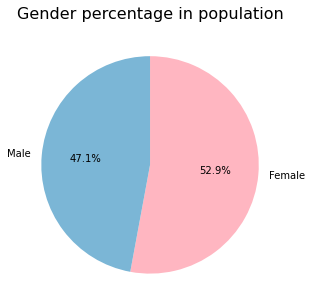

In [10]:
# ploting gender proportions from datset 
# Resize figure for two plots
plt.figure(figsize = [20, 5])
_, _, texts = plt.pie(df_new['sex'].value_counts(), labels =['Female',"Male"], 
                      colors =['lightpink' ,sns.color_palette("RdBu", 10)[-3]] ,
                    startangle = 90, counterclock = False,autopct = '%1.1f%%');
for txt in texts:
    txt.set_color('black')

plt.title('Gender percentage in population', fontsize=16, y=1.015)


plt.show();

there seems to be slightly more female than male in the sample

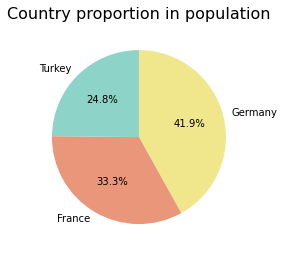

In [11]:
# ploting country proportions of datset
_, _, texts = plt.pie(df_new['country'].value_counts(), labels =['Germany',"France",'Turkey'], 
                      colors =['khaki','darksalmon',sns.color_palette("Set3", 10)[0]] ,
                    startangle = 90, counterclock = False,autopct = '%1.1f%%');
for txt in texts:
    txt.set_color('black')

plt.title('Country proportion in population', fontsize=16, y=1.015)
plt.show();

Germany has more respondants number than other countries

### Looking at the age distribution of the respondants

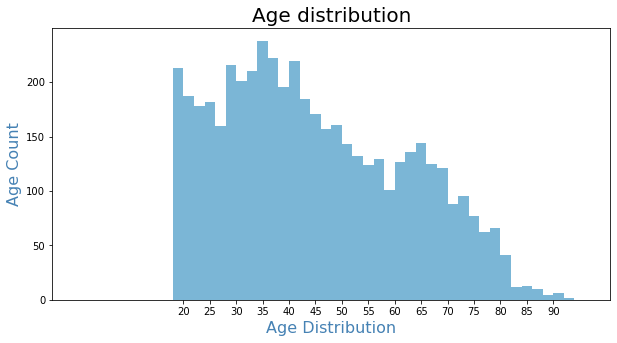

In [12]:
#Plot age distribution
#remove the space from 0 on the y axes to 20 on the xaxix
plt.figure(figsize = [10, 5]) 

bins = np.arange(0, df_new['age'].max()+4, 2)
ticks = np.arange(20,95,5)
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_new, x = 'age', bins = bins,color=sns.color_palette("RdBu", 10)[-3]);
plt.xticks(ticks, labels)
plt.xlabel('Age Distribution', fontsize=16,color='steelblue')
plt.ylabel('Age Count', fontsize=16,color='steelblue' )
plt.title('Age distribution', fontsize=20)
plt.show();

The number of people aged between 20 and 50 are more than people aged more than 50

### Do the people interviewed preceive work as important or not important

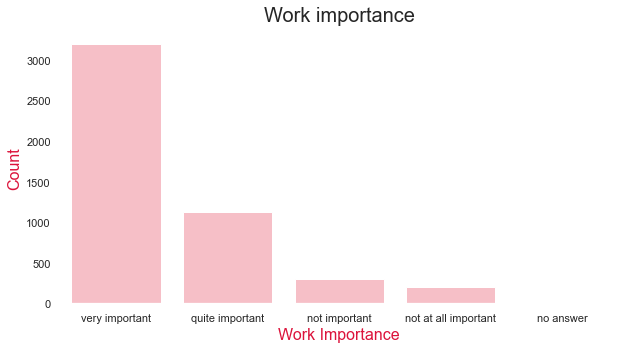

In [13]:
#Plot work importance variable which describes how important is work in the life of the interviewers
plt.figure(figsize = [10, 5]) 
sns.set(rc={'axes.facecolor':'white'})
sns.countplot(data=df_new, x='work_importance', 
             order= ["very important","quite important","not important","not at all important","no answer"],
             color='lightpink');
plt.xlabel('Work Importance', fontsize=16,color='crimson')
plt.ylabel('Count', fontsize=16,color='crimson' )
plt.title('Work importance', fontsize=20, y=1.015)
plt.show();

Most of respondants preceive work as very important

### I am curious about the level of education fo respondants

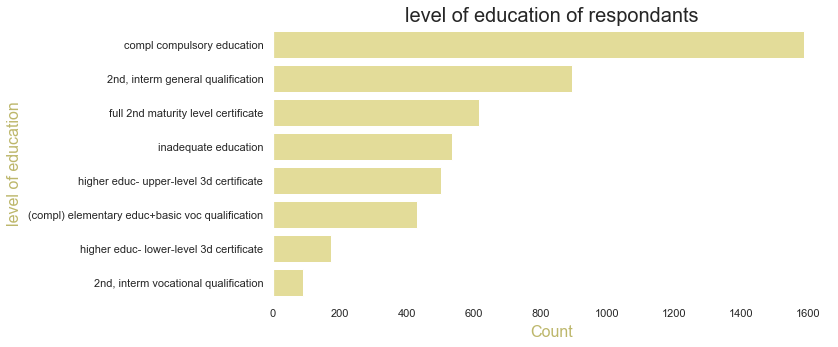

In [14]:
#Plot education level of respondants

level_education = df_new.highest_educ_lvl.value_counts()

plt.figure(figsize = [10, 5]) 
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(x=level_education, y=level_education.index, color = "khaki")
plt.title('level of education of respondants', fontsize=20)
plt.xlabel('Count', labelpad=6, fontsize=16,color='darkkhaki')
plt.ylabel('level of education', labelpad=6, fontsize=16,color='darkkhaki')
plt.show;

### How is the life satisfaction  of the population

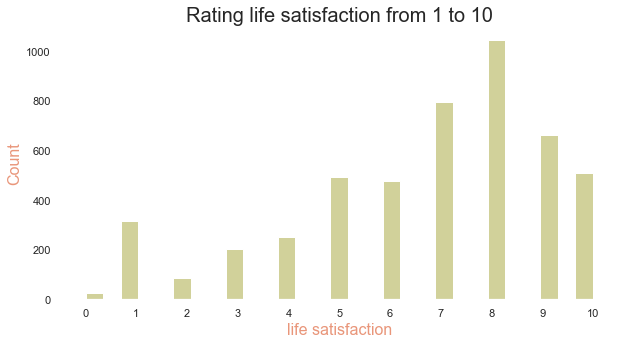

In [15]:
#plotting life satisfaction varibale which is a rating from 1 to 10
plt.figure(figsize = [10, 5]) 
sns.histplot(df_new['life_satisfaction'])
ticks = np.arange(0,11,1)
labels = ['{}'.format(v) for v in ticks]

sns.histplot(df_new['life_satisfaction'], kde=False,color='khaki');
plt.xticks(ticks, labels);
plt.xlabel('life satisfaction', fontsize=16,color='darksalmon')
plt.ylabel('Count', fontsize=16,color='darksalmon' )
plt.title('Rating life satisfaction from 1 to 10', fontsize=20)
plt.show();

most of respondants feel quite satisfied

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> it was a bit weird that even though respondants preceive work as important but their life satsfaction is not maximized, it may show that life satisfaction is not directly related to work

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> it is a bit weird how people are not satisfied with their life (rating 1) more than people who are somewhat satisfied (rating 4)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<h3> Question  1 : Does life_satisfaction depend on the country?
 </h3>

In [16]:
#we need to convert country column as catgorical to better use facet grid
df_new['country'] = df_new.country.astype('category')


<Figure size 2160x720 with 0 Axes>

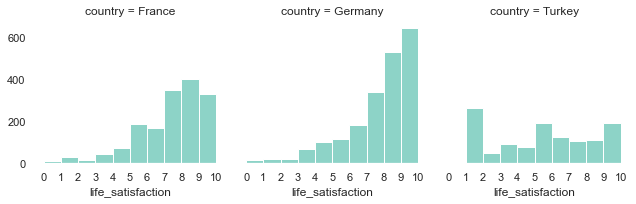

In [17]:
plt.figure(figsize = [30, 10]) ;
g = sns.FacetGrid(data = df_new, col = 'country');
ticks = np.arange(0,15,1);
labels = ['{}'.format(v) for v in ticks];
plt.xticks(ticks, labels);
g.map(plt.hist,"life_satisfaction",color=sns.color_palette("Set3", 10)[0]);
plt.show();
#we need to calculate the proportions because germany has the highest number of respondents

In [18]:
totals_countries = df_new.country.value_counts()
totals_countries

Germany    2036
France     1615
Turkey     1206
Name: country, dtype: int64

In [19]:
satfis_country = df_new.groupby('country')['life_satisfaction'].value_counts()
satfis_country

country  life_satisfaction
France   8                    402
         7                    349
         5                    186
         9                    173
         6                    169
         10                   159
         4                     74
         3                     45
         1                     32
         2                     16
         0                     10
Germany  8                    532
         9                    424
         7                    339
         10                   222
         6                    183
         5                    114
         4                    101
         3                     66
         1                     21
         2                     20
         0                     14
Turkey   1                    263
         5                    192
         10                   128
         6                    124
         8                    109
         7                    106
         3           

In [20]:
#calculating proportions
france_prop =satfis_country['France']/totals_countries['France']
Germany_prop =satfis_country['Germany']/totals_countries['Germany']
Turkey_prop =satfis_country['Turkey']/totals_countries['Turkey']

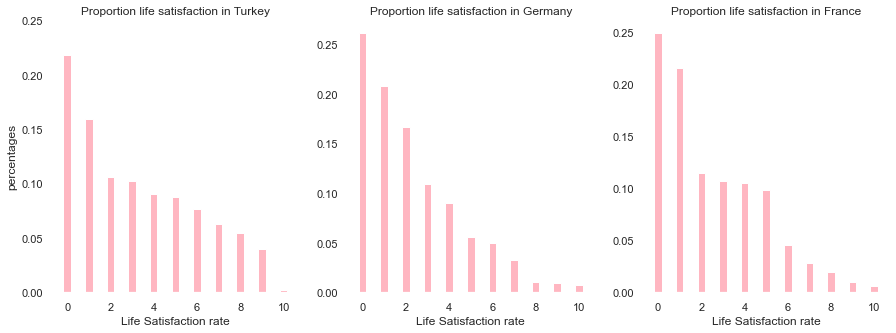

In [21]:
fig, axes = plt.subplots(1, 3) 
axes = axes.flatten()
fig.set_figheight(5)
fig.set_figwidth(15)


plt.subplot(1, 3, 1) 

ticks = np.arange(0,11,1)
plt.bar(ticks, Turkey_prop,width = 0.35,color='lightpink' );
plt.ylim(top=0.25)
plt.ylabel('percentages')
plt.xlabel('Life Satisfaction rate')
plt.title('Proportion life satisfaction in Turkey')


plt.subplot(1, 3, 2) 
plt.bar(ticks, Germany_prop,width = 0.35,color='lightpink');
plt.xlabel('Life Satisfaction rate')
plt.title('Proportion life satisfaction in Germany')

plt.subplot(1, 3, 3) 
plt.bar(ticks, france_prop,width = 0.35,color='lightpink');
plt.xlabel('Life Satisfaction rate')
plt.title('Proportion life satisfaction in France')

plt.show();

<h4>conclusion : even though proportions are so close but Turkey has less unsatisfaction life rate and higher life satisfaction rate  </h4>

<h3> Question  2 : Does work satisfaction depend on the country? (I will work on the proportions directly) </h3>

In [22]:
#calculating totals
totals_countries = df_new.country.value_counts()
#calculating each quantity
work_satis_country = df_new.groupby('country')['overal_satisfaction_work'].value_counts()
#calculating proportions
france_prop =work_satis_country['France']/totals_countries['France']
Germany_prop =work_satis_country['Germany']/totals_countries['Germany']
Turkey_prop =work_satis_country['Turkey']/totals_countries['Turkey']

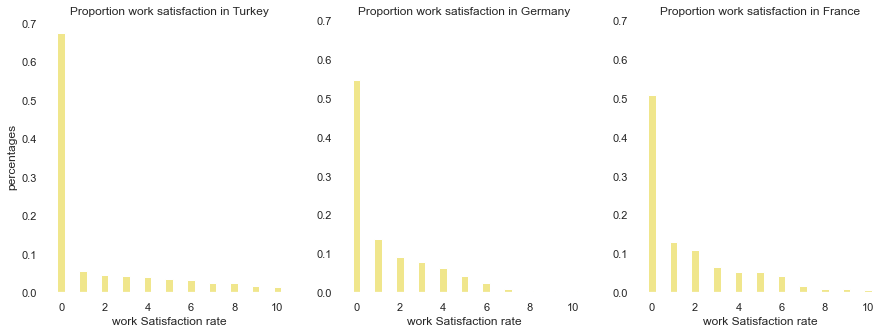

In [23]:

fig, axes = plt.subplots(1, 3) 
axes = axes.flatten()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.ylim(top=0.7)

plt.subplot(1, 3, 1) 
ticks = np.arange(0,11,1)
plt.bar(ticks, Turkey_prop,width = 0.35,color='khaki');
plt.ylabel('percentages')
plt.xlabel('work Satisfaction rate')
plt.title('Proportion work satisfaction in Turkey')


plt.subplot(1, 3, 2) 
plt.bar(ticks, Germany_prop,width = 0.35,color='khaki');
plt.ylim(top=0.7)
plt.xlabel('work Satisfaction rate')
plt.title('Proportion work satisfaction in Germany')

plt.subplot(1, 3, 3) 
plt.bar(ticks, france_prop,width = 0.35,color='khaki');
plt.xlabel('work Satisfaction rate')
plt.title('Proportion work satisfaction in France')

plt.show();

<h4 >conclusion : workers in Turkey seems to be more unsatisfied (rate = 0) than those in Germany and France but maybe if we sum other rates (1,2,3) they can have closer unsatisfaction rate   </h4>
Needs further investigation 

<h3> Question 3 : Is work preceived more important from a certain age more than the another ?</h3> 

Let's make categoreis for each age group

In [24]:
df_new.age.describe()

count    4855.000000
mean       44.315345
std        17.256447
min        18.000000
25%        30.000000
50%        42.000000
75%        58.000000
max        93.000000
Name: age, dtype: float64

In [25]:
category_age = []
for i in df_new.age:
    if i>70 :
        category_age.append('more than 70')
    elif i>50 and i<= 70:
        category_age.append('Between 50 and 70')
    elif i>30 and i<=50 :
        category_age.append('Between 30 and 50')
    elif i>18 and i<=30 :
        category_age.append('Between 18 and 30')
    else:
        category_age.append('None')
df_new['category_age'] = category_age
df_new.category_age.value_counts()

Between 30 and 50    1919
Between 50 and 70    1269
Between 18 and 30    1136
more than 70          420
None                  113
Name: category_age, dtype: int64

In [26]:
sns.color_palette("Set3", 10)[0]

(0.5529411764705883, 0.8274509803921568, 0.7803921568627451)

<Figure size 2880x1440 with 0 Axes>

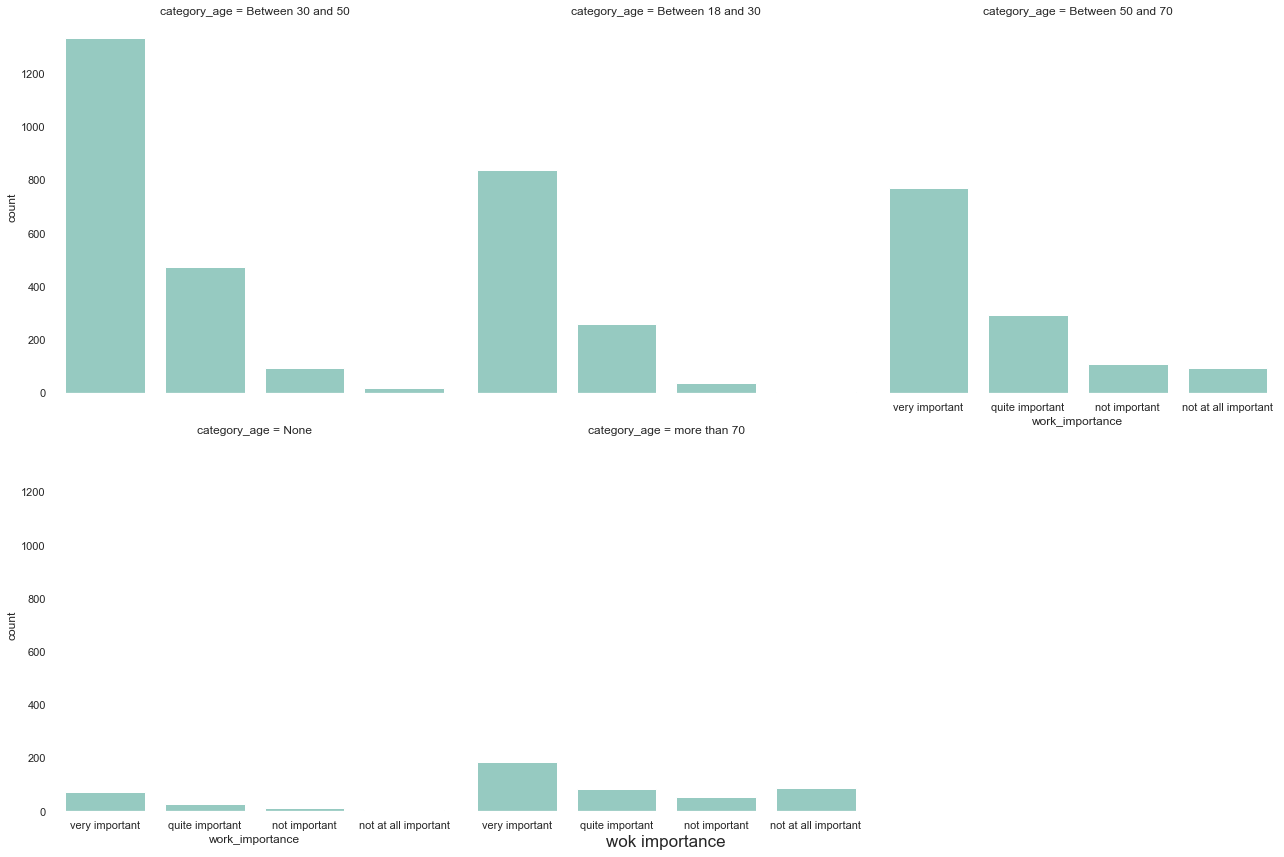

In [27]:
plt.figure(figsize = [40, 20]) ;

sns.color_palette("rocket");

g = sns.FacetGrid(data = df_new, col = 'work_importance' ,height=5,aspect=1.5 ,col_wrap=2, palette='rocket');
g.map(sns.countplot,'category_age',order=['Between 18 and 30','Between 30 and 50','Between 50 and 70','more than 70','None']
  ,color=sns.color_palette("Set3", 10)[0]);
plt.xlabel('wok importance',fontsize=17);
plt.title('work importance by age category', y=2.25, fontsize = 16);
plt.show();

<h4> conclusion : people aged 30 to 50 value work more than other ages</h4>

### Question 4 : Does life and work satisfaction depend on the age?

<Figure size 2880x1440 with 0 Axes>

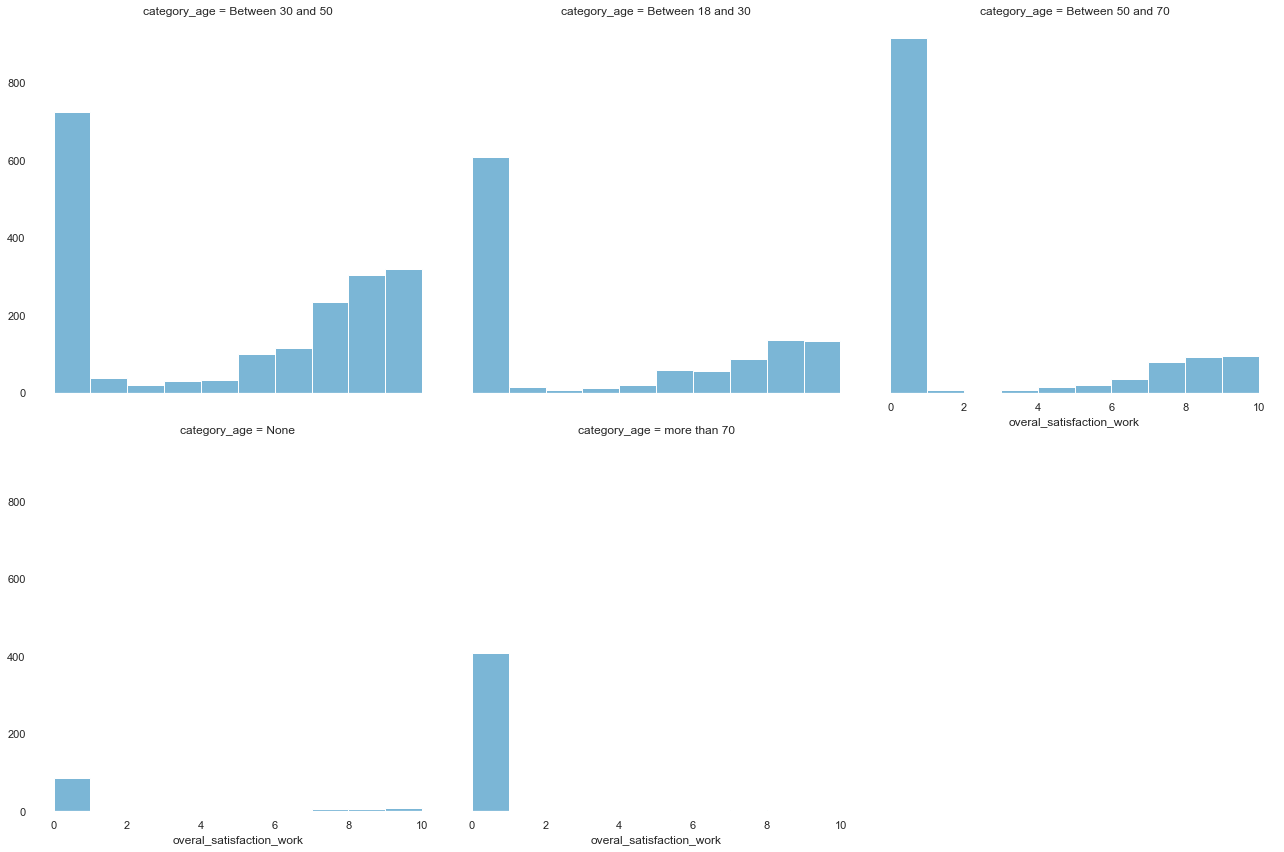

In [28]:
plt.figure(figsize = [40, 20]) ;
bins = np.arange(0,11,1);
g = sns.FacetGrid(data = df_new, col = 'category_age' ,height=6,col_wrap=3);
g.map(plt.hist,"overal_satisfaction_work",bins=bins, color= sns.color_palette("RdBu", 10)[-3]);
plt.show();


#### People aged between 50 and 70 are more unsatisfied with their work then people aged between18 and 30
As if the more you get older the more unsatisfied you are 
But looking at it from another perspective people aged between 30 and 50 have a higher satisfaction wrok rate than those aged between 18 and 30 and those aged between 50 and 70

### Question 5 : Do some job preferences lead to the satisfaction of people more than other?

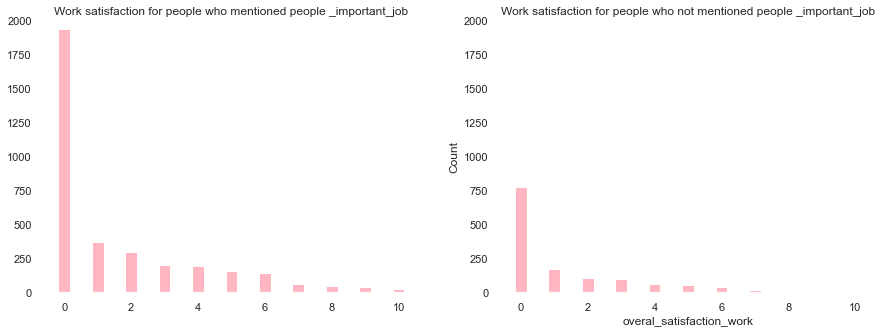

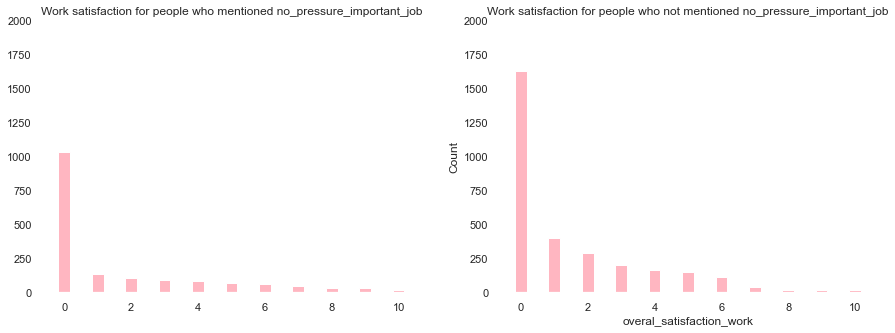

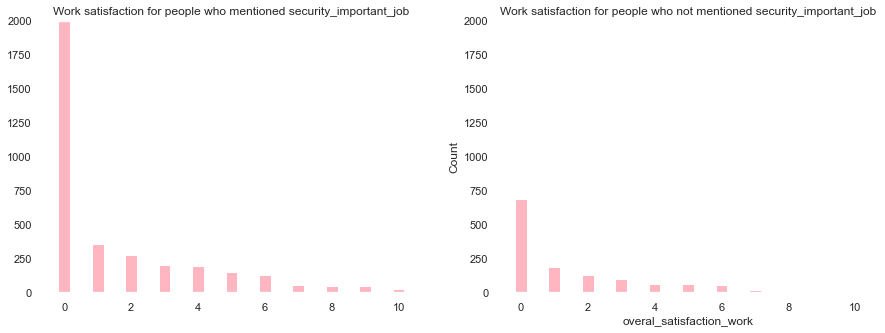

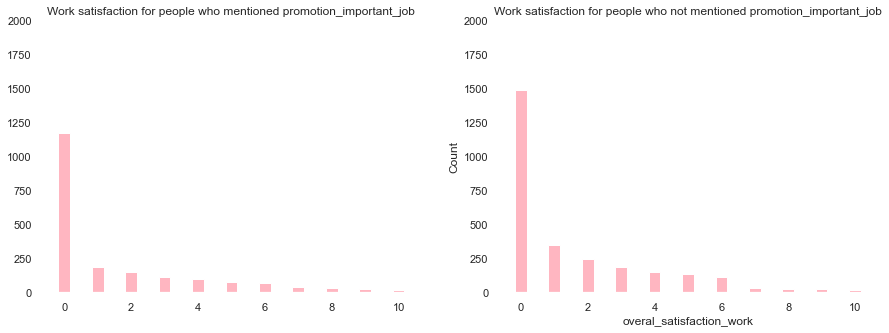

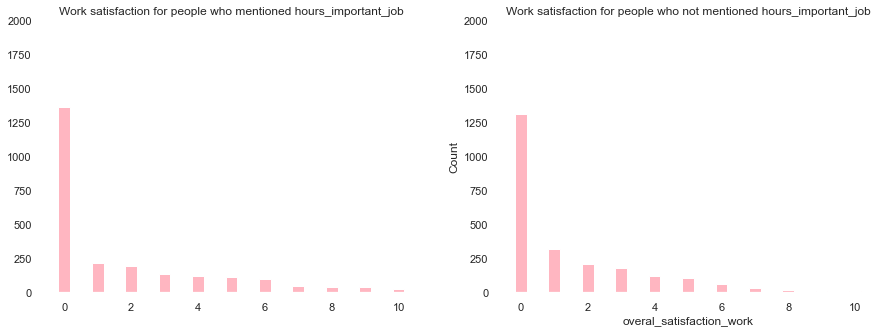

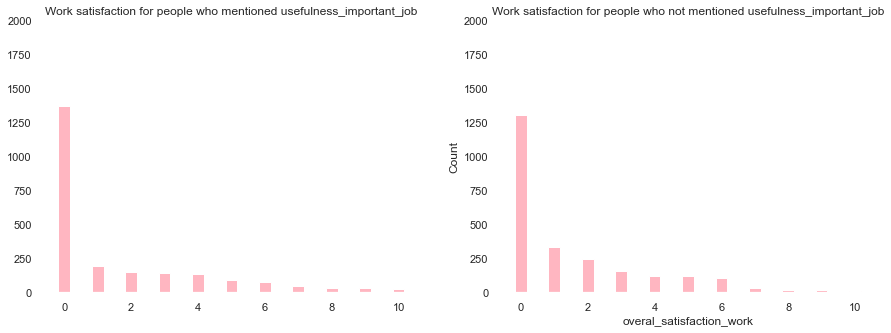

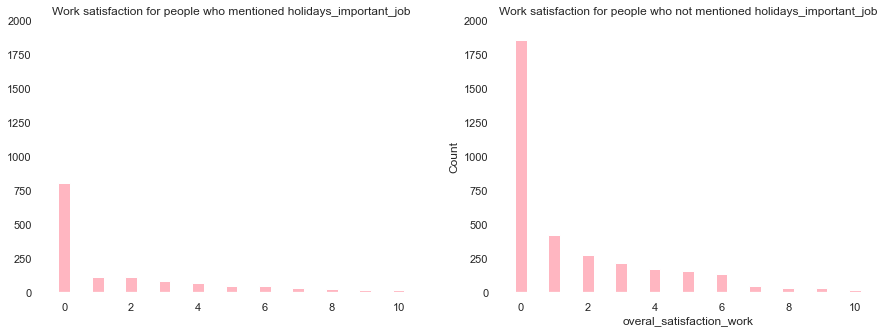

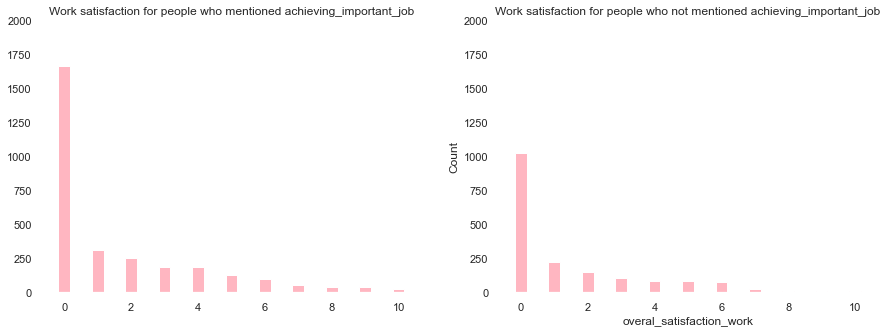

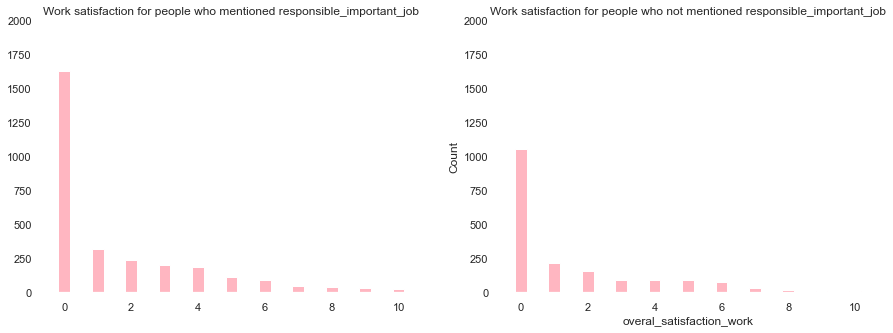

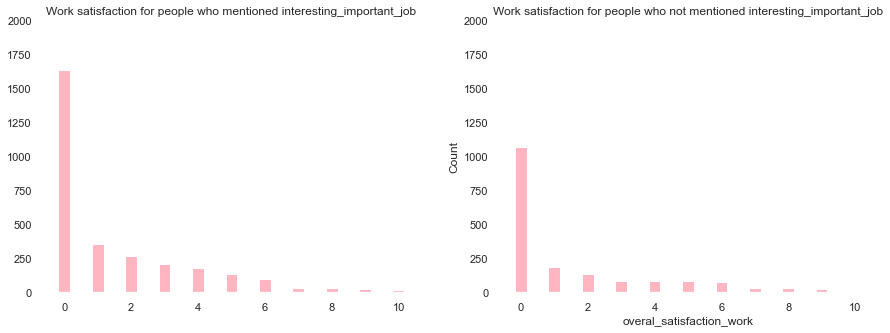

In [29]:
for x in [ 'people _important_job',
       'no_pressure_important_job', 'security_important_job',
       'promotion_important_job', 'hours_important_job',
       'usefulness_important_job', 'holidays_important_job',
       'achieving_important_job', 'responsible_important_job',
       'interesting_important_job']:
    serie = df_new.groupby(x)['overal_satisfaction_work'].value_counts()

    fig, axes = plt.subplots(1,2) 
    axes = axes.flatten()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plt.ylim(top=2000)
    j=1
    for i in ["mentioned","not mentioned"]:
        plt.subplot(1,2 , j) 
        plt.bar([0,1,2,3,4,5,6,7,8,9,10], serie[i],width = 0.35,color='lightpink' );
        plt.title('Work satisfaction for people who'+' '+ i+' ' +x)
        plt.ylim(top=2000)

        j=2
    plt.ylabel('Count')
    plt.xlabel('overal_satisfaction_work')
    plt.ylim(top=2000)


    plt.show();

#### conclusions : 
- people who consider pay as important in a job are more unsatisfied with their work 
- people who consider security as immpotant to have in a job are more unsatisfied than others 
- people who did not mention holdiay as important for a job are more unsatisfied

it maybe that when you focus on money you can't be satisfied with the work or when you focus on security you feel unsecure and not satisfied but we can not assert these statement

whereas, when people did not mention holiday as important in their work they then felt unsatisfied more : maybe because they didn't ask for holidays or they did not rest and benefited from payed_from_work holidays 

### Question 6 : is there a coorelation between variable?

                          overal_satisfaction_work  free_to_choose  \
overal_satisfaction_work                  1.000000        0.110886   
free_to_choose                            0.110886        1.000000   
life_satisfaction                         0.165174        0.331562   
age                                      -0.255477        0.060942   

                          life_satisfaction       age  
overal_satisfaction_work           0.165174 -0.255477  
free_to_choose                     0.331562  0.060942  
life_satisfaction                  1.000000  0.094722  
age                                0.094722  1.000000  


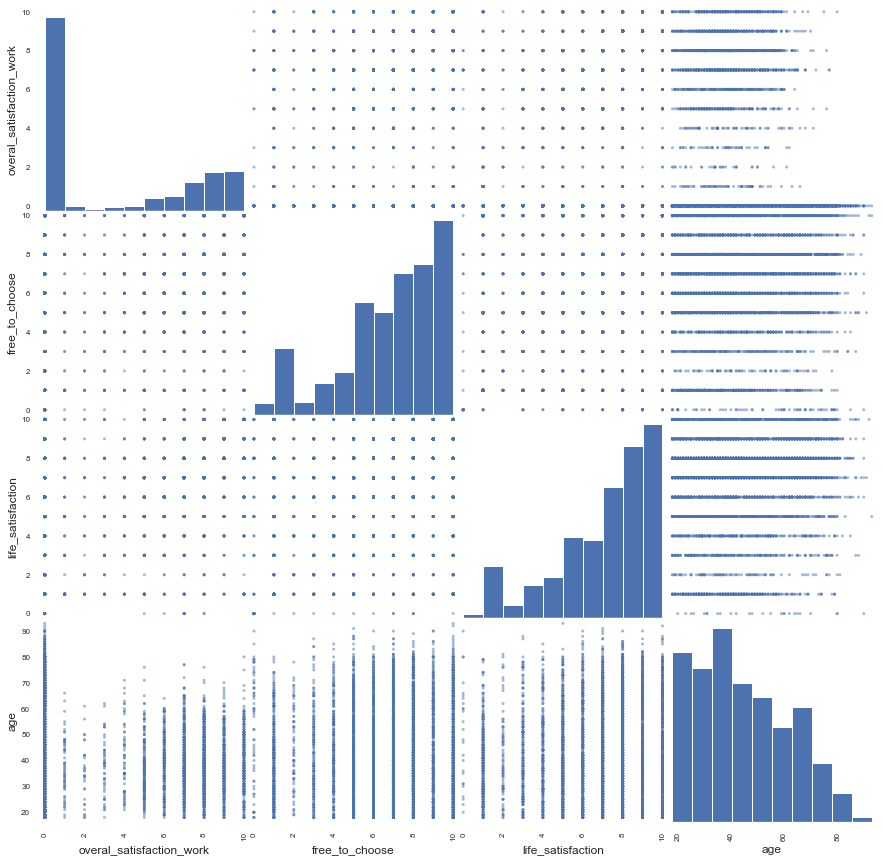

In [30]:
#plotting a scatter plot
print(df_new.corr())
pd.plotting.scatter_matrix(df_new, figsize = (15,15));

conclusion I don't see any relationship

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> relationship between work satisfaction and country 

- workers in Turkey seems to be more unsatisfied in their life(rate = 0) than those in Germany and France but maybe if we sum other rates (1,2,3) they can have closer unsatisfaction rate 

> relationship between work importance/ work satisfaction and country 

- people aged 30 to 50 value work more than other ages

- People aged between 50 and 70 are more unsatisfied with their work then people aged between18 and 30
As if the more you get older the more unsatisfied you are 
- from another perspective people aged between 30 and 50 have a higher satisfaction wrok rate than those aged between 18 and 30 and those aged between 50 and 70

> relationship between work criterias and work satisfaction

- people who consider pay as important in a job are more unsatisfied with their work 
- people who consider security as immpotant to have in a job are more unsatisfied than others 
- people who did not mention holdiay as important for a job are more unsatisfied
it maybe that when you focus on money you can't be satisfied with the work or when you focus on security you feel unsecure and not satisfied but we can not assert these statement

whereas, when people did not mention holiday as important in their work they then felt unsatisfied more : maybe because they didn't ask for holidays or they did not rest and benefited from payed_from_work holidays 



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> relationship between life satisfaction and country 

- even though life satisfaction rate proportions are so close but Turkey has less unsatisfaction life rate and higher life satisfaction rate 

- I discovered the category of ages that has the highest work importance rate (people aged 30 to 50)

## Multivariate Exploration


### Question 7 : Does the sex and age effect the life satisfaction for respondants?

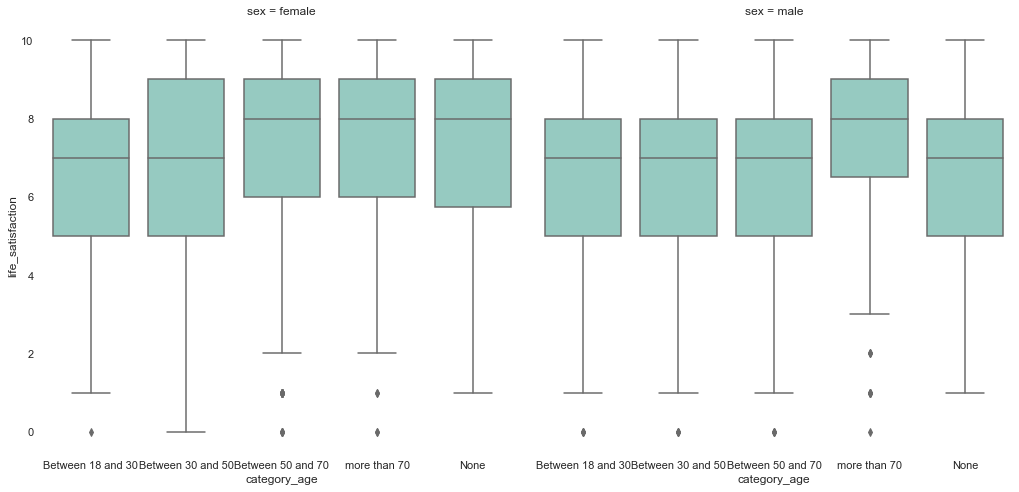

In [31]:

g = sns.FacetGrid(data = df_new, col = 'sex', height = 7,col_wrap=4)
g.map(sns.boxplot, 'category_age', 'life_satisfaction'
      ,order=["Between 18 and 30","Between 30 and 50","Between 50 and 70","more than 70","None"]
      ,color=sns.color_palette("Set3", 10)[0])
#plt.title('The rate of life satisfaction among gender and ages' 
#          , fontsize = 16,y=1.25,horizontalalignment='center');
plt.show();

#### conclusion : femlae have a higher life satisfaction rate tham men espacialy for those aged between 18 and 70
but 75% have a life satisfaction rate above 5 

### Question 8 : Is there a relationship between age, country and the freedom of choice?

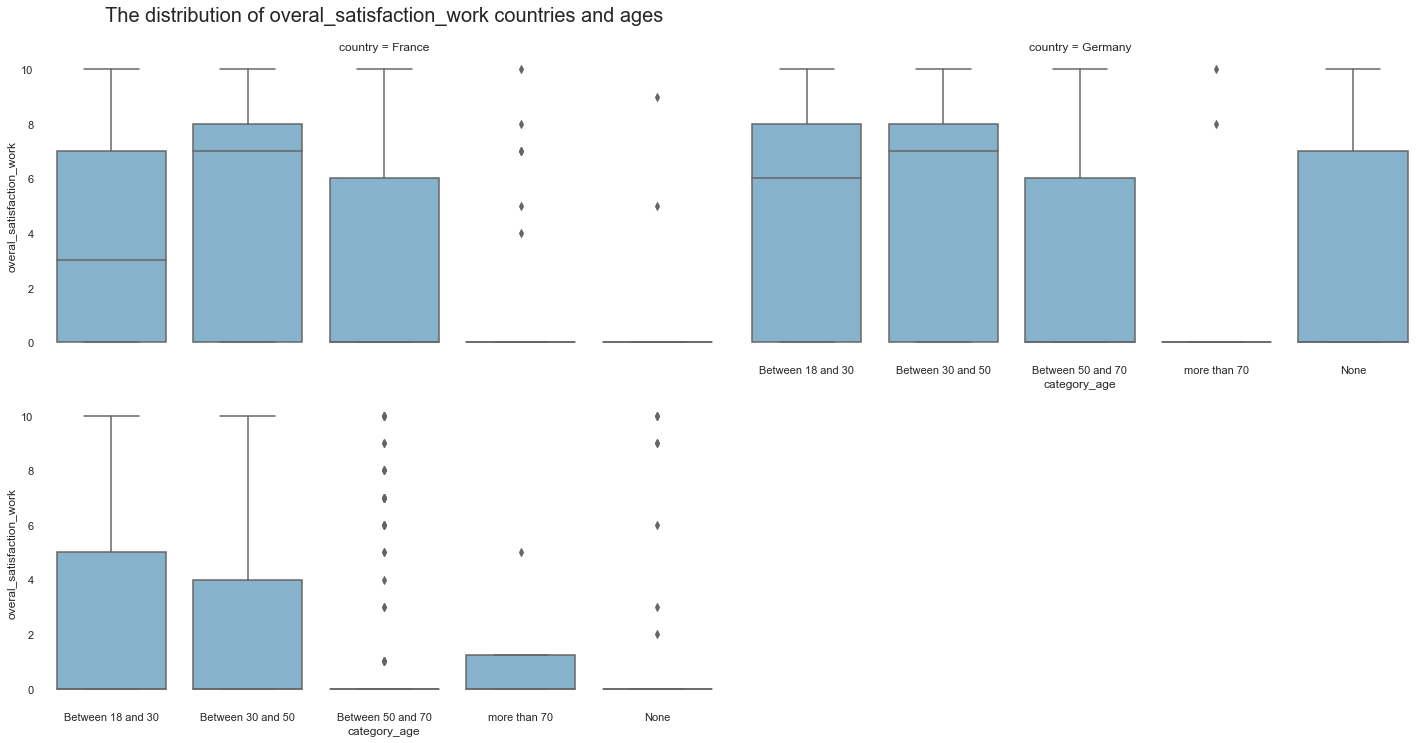

In [32]:

g = sns.FacetGrid(data = df_new, col = 'country', height = 5,aspect = 2 ,col_wrap=2)
g.map(sns.boxplot, 'category_age', 'overal_satisfaction_work'
      ,order=["Between 18 and 30","Between 30 and 50","Between 50 and 70","more than 70","None"]
      ,color=sns.color_palette("RdBu", 10)[-3])
plt.title('The distribution of overal_satisfaction_work countries and ages' 
          , fontsize = 20 , y=2.25,horizontalalignment='center');
plt.show();

#### conclusion : for france and turkey 25% of respondants whose age is between 30 and 50 are satisfied from their work (7 to 8 rating)
in france 75% of respondants whose age is between 18 and 30 are quite to not satisfied with the work (rating less than 7)

### Question 9 : Is there a relationship between work importance, sex and life satisfaction

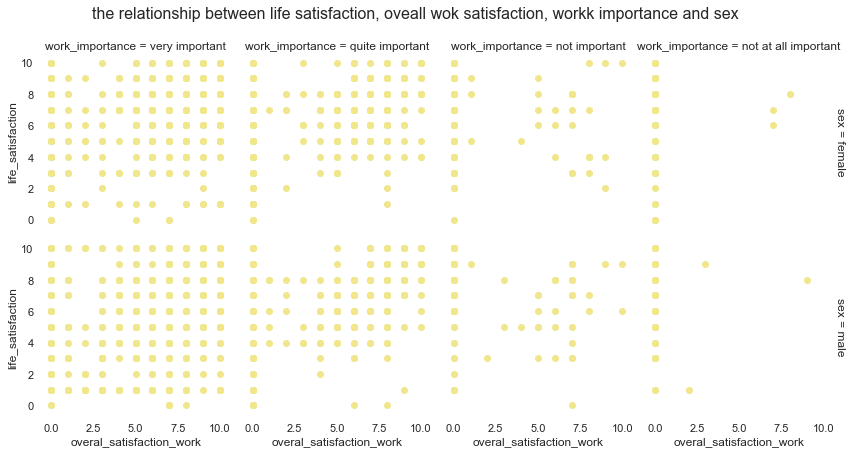

In [33]:
g = sns.FacetGrid(data = df_new, col ='work_importance' , row = 'sex', height = 3,
                margin_titles = True)
g.map(plt.scatter, 'overal_satisfaction_work', 'life_satisfaction',color='khaki');
plt.title('the relationship between life satisfaction, oveall work satisfaction, workk importance and sex' 
          , fontsize = 16 , y=2.25,horizontalalignment='right');
plt.show();

#### conclusion : there seems to be a negative relationship between respondants who see wot as not important and they are satisfied with their work and their life
but at the same time there seems to be a positive relation between people who are satisfied with their work and life but they don't find work impotant
it maybe that preceiving work as important gives you more stress, whereas people who are satisifed in the work it is not because of the impotance of work it is because of their life satisfaction
so the more satisfied someone is in his overall life that may lead to work satisfaction
Needs further investigation


### Question 10 : Is there a relationship between work importance, sex and work satisfaction

In [34]:
average = df_new.overal_satisfaction_work.mean()
average

3.1297096973440395

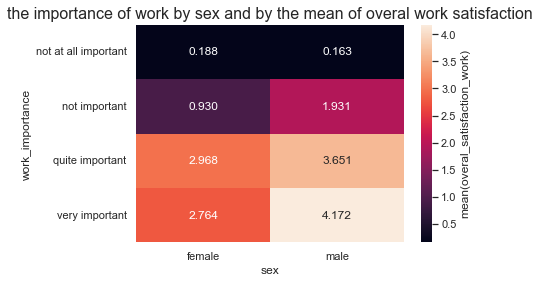

In [35]:
cat_means = df_new.groupby(['sex', 'work_importance']).mean()['overal_satisfaction_work']
cat_means = cat_means.reset_index(name = average)
cat_means = cat_means.pivot(index = 'work_importance', columns = 'sex',
                            values = average)
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(overal_satisfaction_work)'})
plt.title('the importance of work by sex and by the mean of overal work satisfaction', fontsize=16)
plt.show();

#### conclusion : 50% of male respondants who preceive work as very important have the highest average rate of work satisfaction

### Question 11 : Is there a relationship between work importance, sex importance and work satisfaction


In [36]:
df_new.sex.value_counts()

female    2570
male      2287
Name: sex, dtype: int64

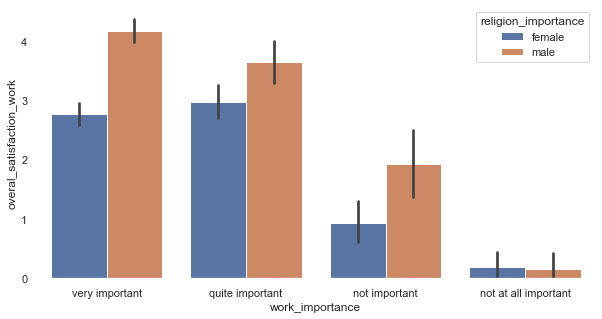

In [37]:
#does religion impact work satisfaction, work importance, overall satisfaction
plt.figure(figsize = [10, 5]) 
ax = sns.barplot(data = df_new, x = 'work_importance', y = 'overal_satisfaction_work', hue = 'sex',
                 order=['very important','quite important','not important','not at all important'])
ax.legend(title = 'religion_importance')

plt.show();

#### conclusion : It seems like men tend to value work more as important and they tend to feel it is more satisfiying

### Question 12 : Is there a relationship between work importance,overal_satisfaction_work, free_to_choose and sex

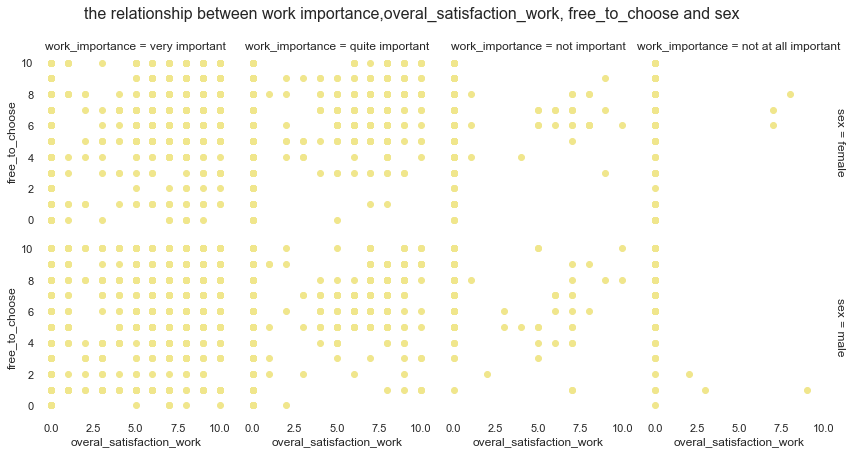

In [38]:
g = sns.FacetGrid(data = df_new, col ='work_importance' , row = 'sex', height = 3,
                margin_titles = True)
g.map(plt.scatter, 'overal_satisfaction_work', 'free_to_choose',color='khaki');
plt.title('the relationship between work importance,overal_satisfaction_work, free_to_choose and sex' 
          , fontsize = 16 , y=2.25,horizontalalignment='right');
plt.show();

#### Conclusion : There seems to be a positive relationship between male respondants' freedom of choice and their work satisfaction given that work is not important to them


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> relationship between life satisfaction, sex and age

- female have a higher life satisfaction rate than men espacialy for those aged between 18 and 70 but 75% have a life satisfaction rate above 5 

> relationship between work satisfaction, country and age

- for france and turkey 25% of respondants whose age is between 30 and 50 are satisfied from their work (7 to 8 rating) in france 75% of respondants whose age is between 18 and 30 are quite to not satisfied with the work (rating less than 7)

> relationship between life satisfaction, work satisfaction and work importance

- there seems to be a negative relationship between respondants who see work as not important and they are satisfied with their work and their life 
but at the same time there seems to be a positive relation between people who are satisfied with their work and life but they don't find work impotant
it maybe that preceiving work as important gives you more stress, whereas people who are satisifed in the work it is not because of the impotance of work it is because of their life satisfaction
so the more satisfied someone is in his overall life that may lead to work satisfaction
Needs further investigation

> relationship between work satisfaction, work importance and sex

- male respondants who preceive work as very important have the highest average rate of work satisfaction


> relationship between work satisfaction, work importance and sex

- It seems like men tend to value work more as important and they tend to feel it is more satisfiying

- There seems to be a positive relationship between male respondants' freedom of choice and their work satisfaction given that work is not important to them


### Were there any interesting or surprising interactions between features?

> I liked how there seems to be a positive relation between people who are satisfied with their work and life but they don't find work impotant

> It was a surprise that male respondants who preceive work as very important have the highest average rate of work satisfaction

and at the same time 

> female have a higher life satisfaction rate than men espacialy for those aged between 18 and 70 

as if man enjoy themselves more in work and female enjoy life more than work

which can explain why 
> It seems like men tend to value work more as important and they tend to feel it is more satisfiying

but at the same time we have men who don't see work as important but they get more and more satisfied with work the more freedom of choice they get

## Conclusions



### Reflecting back on the steps
- I tried to discover frequencies and distribution of different variables : country, age, sex, life satisfaction...
- I tried to see the relationship between work satisfaction, work impotance and life satisfaction based on age, country, sex,...
- I tried to see the relationship between 3 or more variables at the time : my main focus was to explain work impotance and work satisfaction using life satisfaction, age, sex, freedom of choice etc...

### The most important points I figured out

> What makes your epmolyees satisfied : maybe life satisfaction 

> How to recruit employees that become satisfied and may pay more importance to work : maybe based on gender (male) and freedom of choice

       because there are men who don't see work as important but they get more and more satisfied with work the more freedom                                             of choice they get

> which cateogry of ages pays more importance to work : between 30 and 50
    
>importance to work may not lead to satisfaction for employees

>Turkey has less unsatisfaction life rate and higher life satisfaction rate 










 